# Modeling the Effect of Gaussian Noise on Sigmoid Output in Logistic Regression

### Type:
Theoretical analysis + simulation
### Status:
Self-directed study (unpublished)

## Logistic Regression as a Statistical model:
Logistic regression is a class of algorithms used to solve problems related to binary classification. For our purpose, we refer to Logistic regression through the lens of a GLM, or a 'Generalised Linear Model'.

## What is a GLM? An example through Logistic Regression:

1. A Generalised Linear Model is a statistical technique used to link a linearly predicted value to the range space of the output. The range space for a Logistic model is given by {0, 1}, i.e. either true(1) or false(0), which is what we will use to demonstrate the study.
2. Suppose an input space given by a matrix X, with m samples and n features per sample. This will make the space of shape $m$ x $n$, with m rows and n columns: each row representing 1 sample.
3. Selecting any arbitrary $i \in \mathbb{N} \cap [1, m]$, we have a row sample $\vec{X^{(i)}} \in \mathbb{R}^{n}$ from the input space X.
4. First, we transform this row vector $\vec{X^{(i)}}$ to a real value $\mathbb{R}$ using the linear transform $T_{1}$ such that $T_{1} (\vec{X^{(i)}}) = \vec{X^{(i)}} \vec{\theta} = \eta^{(i)}$, where $T_{1}: \mathbb{R}^{n} \longrightarrow \mathbb{R}$. Here, $\vec{X^{(i)}}$ is a row vector, and $\vec{\theta}$ is a column vector, such that $\vec{\theta} \in \mathbb{R}^{n}$ as well.
5. Now, suppose the range space of Y is given to be $R_{y} = {0, 1}$. We now define another transformation $T_{2} (\eta^{(i)})$ where $T_{2}: \mathbb{R} \longrightarrow \{0, 1\}$. This transformation is given by:
$T_{2} (\eta^{(i)})$ = \begin{cases}
0 & \text{if    } g(\eta^{(i)}) < 0.5 \\
1 & \text{if    } g(\eta^{(i)}) \geq 0.5
\end{cases}
where $g(z) = \frac{1}{1 + e^{-z}}, g: \mathbb{R} \longrightarrow (0, 1)$ is called the "Sigmoid Function".

Our overall transformation follows the path $\mathbb{R}^n \xrightarrow{\text{T}_{1}} \mathbb{R} \xrightarrow{\text{T}_{2}} \{0, 1\}$

### Significance of transformations and Link functions:

1. Suppose the transformation $T_{1}$ in above example. We use that transformation to change the target space from $\mathbb{R}^{n}$ to $\mathbb{R}$. This real value that we get from applying the transformation $T_{1}$ on our sample $\vec{X^{(i)}}$ is assumed to store all the required information about the given example.
2. The resultant of this linear transformation gives $\eta^{(i)}$ as our real value, called the "Linear Predictor". We can use this further as an input for a "Link Function", that yields a probabilistic parameter to model our output space.
3. In GLM's, the function/transformation $T_{2}: \mathbb{R} \longrightarrow R_{y}$ is parametrised by the link function, which aids in transforming the linear predictor $\eta^{(i)}$ into a meaningful value from $R_{y}$.

### Criteria for choosing link functions:
1. The link function so chosen should be able to give a global optimum for the parameter vector $\vec{\theta}$ for maximum accuracy over the model.
2. Normally, this is done by link functions called "Canonical Links". These link functions are chosen such that they yield a convex log-likelihood function in terms $\vec{\theta}$. This further allows the use of simple Batch or Stochastic gradient descent to get to our global optimum.
3. Any such functions which do not necessarily yield a convex hypersurface in terms of $\vec{\theta}$, but can still give accurate $\vec{\theta^{*}}$ are called "Non-Canonical Links".

## Aim:
Our aim is to demonstrate the effect of introducing Gaussian noise the linear predictor $\eta$, and how it affects the results in the sigmoid output. We will do this in tandem with a demonstration of Logistic Regression, and show information regarding how the noise manipulates the results.

In [21]:
#Importing all the basic libraries required.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [22]:
#Generating a seed ensures reproducibility of code. 99 is a randomly chosen number.
np.random.seed(27)
#Generating random uniform values for the dataset inputs. These are uniformly distributed over range [-1e5, 1e5].
#The range for the distribution, the distribution itself, the no. of samples, etc. are arbitrary design choices.
X_raw_unbiased = np.random.uniform(low = -1000, high = +1000, size = (5000, 10))
#Now, since this is a GLM, we generate a Q_true parameter column vector to be used for generating the linear predictor.
#Again, the range of the distribution, the distribution itself, etc. are arbitrary design choices that do not influence the result.
Q_true = np.random.uniform(low = -100, high = +100, size = (11, 1))
#Now, we scale down X between 0 and 1. This prevents numerical overflow in memory.
scaler = StandardScaler()
X_scaled_unbiased = scaler.fit_transform(X_raw_unbiased)
#Adding the biasing term in X matrix.
X = np.hstack([np.ones((X_scaled_unbiased.shape[0], 1)), X_scaled_unbiased])
#Now we generate the true linear predictors that will further model the Bernoulli parameters.
eta_true = X @ Q_true
#Now using the sigmoid link, we convert the linear predictor space into the probabilities that will model our distribution.
link_true = 1 / (1 + np.exp(-eta_true))
#Now, converting this into our true binary values, we have:
Y = (link_true >= 0.5).astype(int)

Now, we add some Gaussian noise terms $\epsilon^{(i)}$  $\forall$  $\eta^{(i)} \in$ 'eta_true', each $\epsilon^{(i)}$ ~ $\mathcal{N} (\mu = 0, \sigma = 1)$.

The moment we plugin the "predicted" linear predictor into our canonical link, the values are no longer squished between 0 and 1 purely using sigmoid, due the error term in the linear predictor. The probability distribution of this error can be found by applying basic PDF transformations on random variables:

## Assumptions:

1. The error/noise terms for each sample are distributed normally, such that; if $\epsilon^{(i)}$ is the error term in the $i^{th}$ sample, then:$$\epsilon^{(i)} \sim \mathcal{N} (\mu = 0, \sigma = 1)$$
2. All $\epsilon^{(i)}$ are independently distributed of each other, with identical distributions (being "Normal", as stated above). $$\Rightarrow P(\epsilon^{(i)} = \omega_{(i)} \cap \epsilon^{(j)} = \omega_{(j)}) = P(\epsilon^{(i)} = \omega_{(i)}) P(\epsilon^{(j)} = \omega^{(j)}) $$
3. We have used a $\vec{\theta_{true}}$ to synthesise our data with 5000 samples. Running logistic regression on the "noiseless" form of this dataset will yield a different $\vec{\theta} = \vec{\theta_{noiseless}} \neq \vec{\theta_{true}}$. This $\vec{\theta_{noiseless}}$ is what we will be using for comparison with $\vec{\theta_{predicted}}$ derived from the noisy data.

## PDF of the predicted link function:

The link function output, after accounting for the error term, gives an expression like this: $$ g(\eta^{(i)}) = g(\eta_{noiseless}^{(i)} + \epsilon^{(i)}) = \frac{e^{\eta_{noiseless}^{(i)} + \epsilon^{(i)}}}{1 + e^{\eta_{noiseless}^{(i)} + \epsilon^{(i)}}} = \frac{e^{\eta_{noiseless}^{(i)}} e^{\epsilon^{(i)}}}{1 + e^{\eta_{noiseless}^{(i)}} e^{\epsilon^{(i)}}}$$
For ease of calculation, we first find the PDF of $ e^{\epsilon} $. Doing the basic CDF to PDF transformation, we have:
$$ \int_{-\infty}^{\epsilon} \frac{1}{\sqrt{2 \pi}} exp(- \frac{t^{2}}{2}) dt = \int_{0}^{e^{\epsilon}} P(K = k) dk $$
where K = k is the substitute variable for $e^{\epsilon}$.
$$\Rightarrow \frac{d}{d\epsilon} \int_{-\infty}^{\epsilon} \frac{1}{\sqrt{2 \pi}} exp(- \frac{t^{2}}{2}) dt = \frac{d}{d \epsilon} \int_{0}^{e^{\epsilon}} P(K = k) dk$$
Using Leibnitz' rule, we get:
$$\Rightarrow \frac{1}{\sqrt{2 \pi}} exp(- \frac{\epsilon^{2}}{2}) = e^{\epsilon}.P(K = k)$$

$$\Rightarrow \frac{1}{\sqrt{2 \pi}} exp(- \frac{\epsilon^{2}}{2} - \epsilon) = P(K = k)$$
Putting the conversion $K = e^{\epsilon}$, we have:
$$\Rightarrow \frac{1}{\sqrt{2 \pi}} K^{- \frac{ln (K)}{2} - 1} = P(K = k)$$

Now, we substitute $p = e^{\eta_{noiseless}}$ for simplicity of expression. The link function then becomes:
$$g(\eta^{(i)}) = \frac{p K}{1 + p K} = Z$$

Our model variable for error percentage will be given by this:
$$E(K, \, p) = \frac{Z - g(p)}{g(p)}$$

$$\Rightarrow E(K, \, p) = \frac{\frac{p K}{1 + p K} - \frac{p}{1 + p}}{\frac{p}{1 + p}}$$
Upon simplifying, we get:
$$\Rightarrow E(K, \, p) = \frac{K - 1}{1 + p K}$$
Here,
$$p = e^{\eta_{noiseless}}, \, K = e^{\epsilon} \Rightarrow p > 0, \, K > 0$$
Since the graph of E is monotonic in K, for K > 0 and p > 0, we can use the CDF - PDF transform for finding the probability distribution for E:

$$\int_{0}^{E} P(T = t) dt = \int_{0}^{K} \frac{1}{\sqrt{2 \pi}} t^{- \frac{ln (t)}{2} - 1} dt$$

$$\Rightarrow \frac{d}{dK} \int_{0}^{E} P(T = t) dt = \frac{d}{dK} \int_{0}^{K} \frac{1}{\sqrt{2 \pi}} t^{- \frac{ln (t)}{2} - 1} dt$$

$$\Rightarrow (\frac{dE}{dK}) P(E) = \frac{1}{\sqrt{2 \pi}} K^{- \frac{ln (K)}{2} - 1}$$

$$\Rightarrow (\frac{d}{dK} \frac{K - 1}{1 + p K}) P(E) = \frac{1}{\sqrt{2 \pi}} K^{- \frac{ln (K)}{2} - 1}$$

Simplifying, we get:
$$\Rightarrow (\frac{p + 1}{(1 + p K)^{2}}) P(E) = \frac{1}{\sqrt{2 \pi}} K^{- \frac{ln (K)}{2} - 1}$$

$$\Rightarrow P(E) = \frac{(1 + p K)^{2}}{(1 + p) \sqrt{2 \pi}} K^{- \frac{ln (K)}{2} - 1}$$

Now, putting in $K = \frac{1 + E}{1 - p E}$, we get:
$$\frac{(1 + p)}{\sqrt{2 \pi}\,(E + 1)\,(1 - E p)} 
\left( \frac{1 + E}{1 - E p} \right)^{ -\frac{1}{2} \ln\left( \frac{1 + E}{1 - E p} \right) } = P(E)$$

## Simulation:
1. For our simulation purpose, we will be choosing 10 equally spaced samples from our sampleset.
2. For each sample, we shall simulate and introduce 100 different $\epsilon^{(i)} \sim \mathcal{N} (\mu = 0, \sigma = 1)$ per $i^{th}$ sample, and produce a scatterplot.
3. There will be 10 graphs, each having a particular $p^{(i)} = e^{\eta^{(i)}_{noiseless}}$ as defined earlier. 

In [23]:
#First, fetching 10 equally spaced indices from eta_true, to represent our samples.
indices = np.linspace(0, len(eta_true) - 1, 10, dtype = int)
#Fetching the samples in a column vector.
true_samples = eta_true[indices]
#Now, for each sample we generate 100 gaussian errors. A matrix of 10 rows and 100 columns:
sim_noise = np.random.randn(10, 100)
#Now getting the noisy samples for each, we have:
sim_samples_noise = true_samples + sim_noise
#Applying sigmoid to get the noisy link functions and the noiseless link functions:
sigmoid = lambda z: 1 / (1 + np.exp(-z))
noisy_sigmoid = sigmoid(sim_samples_noise)
pure_sigmoid = sigmoid(true_samples)
#Calculating error models:
errors = (noisy_sigmoid - pure_sigmoid) / pure_sigmoid

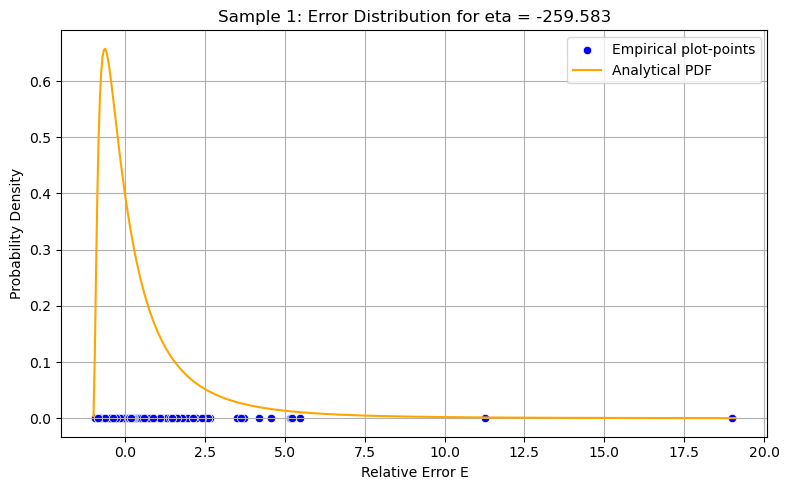

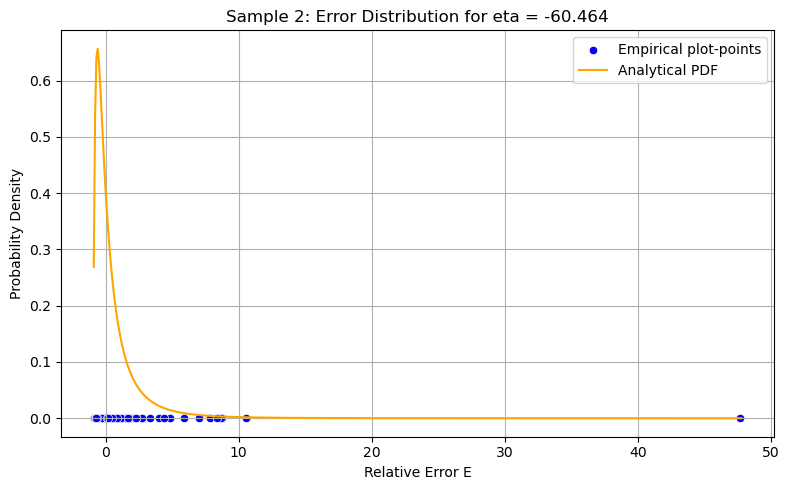

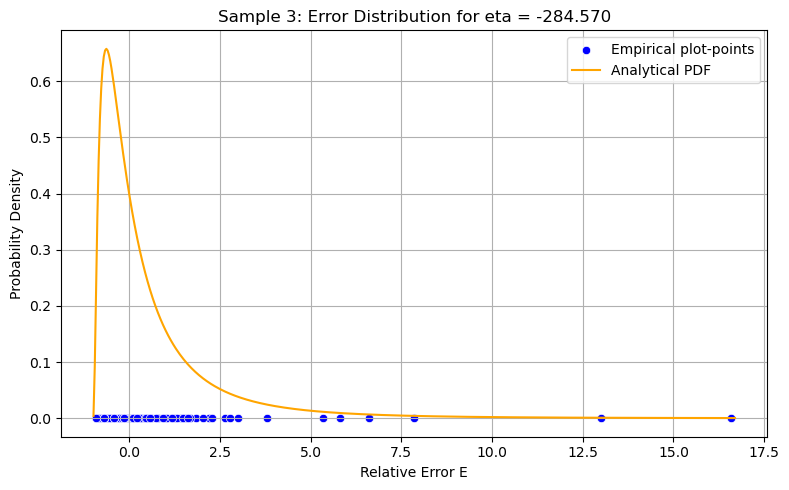

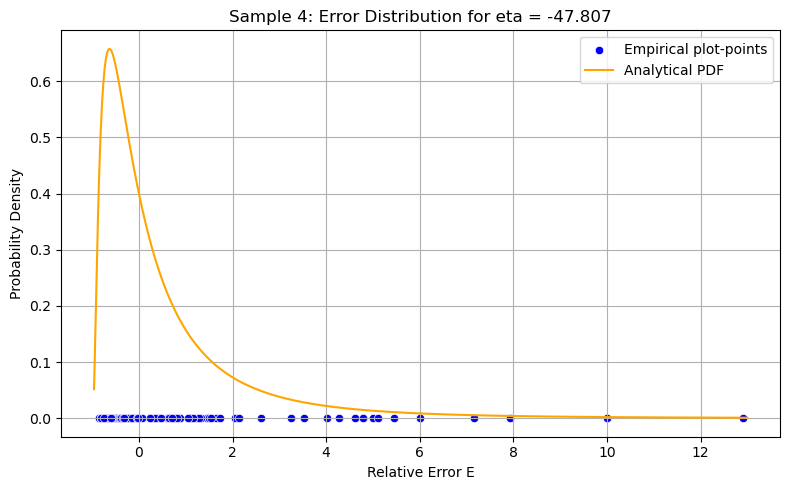

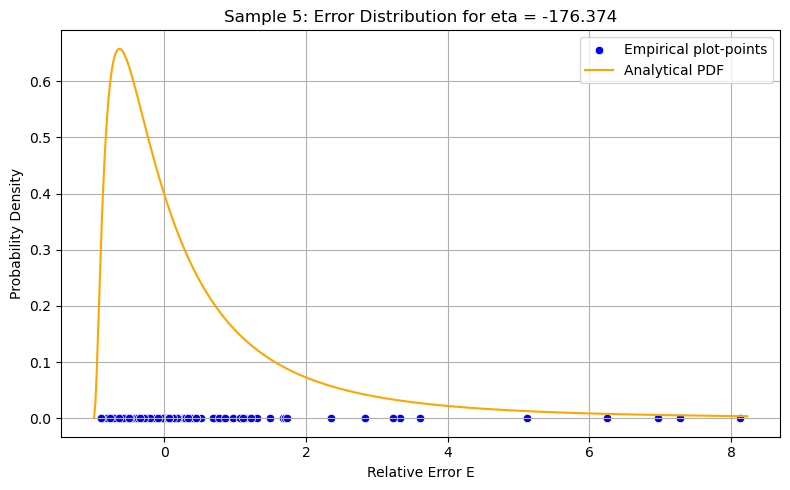

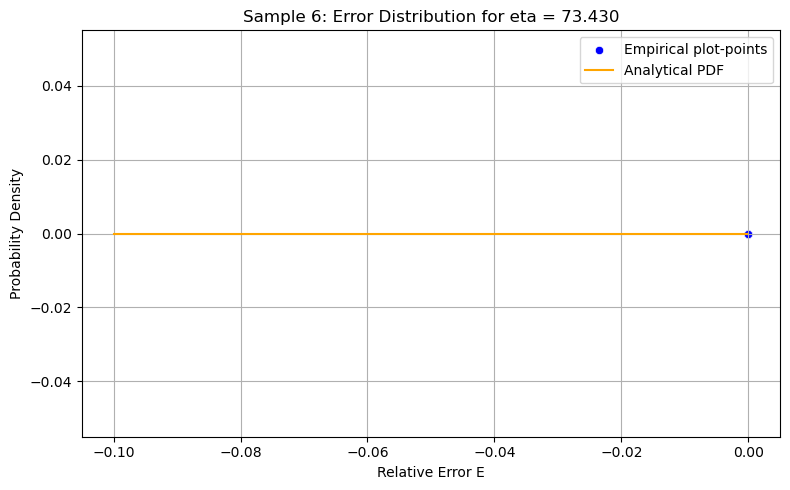

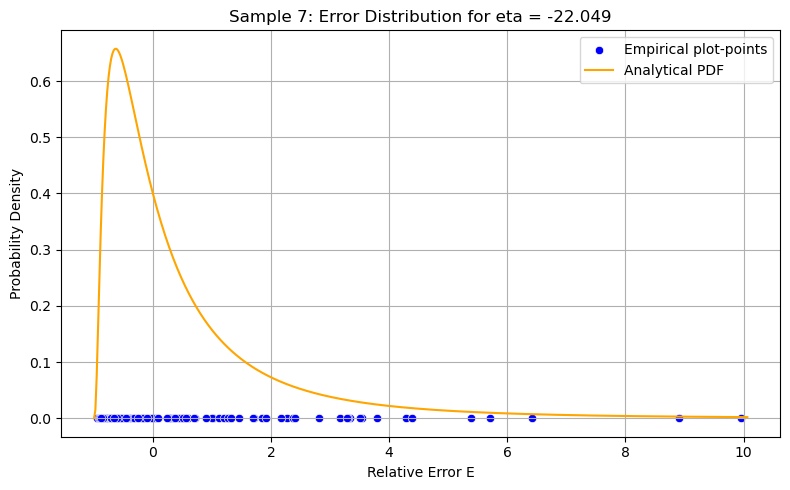

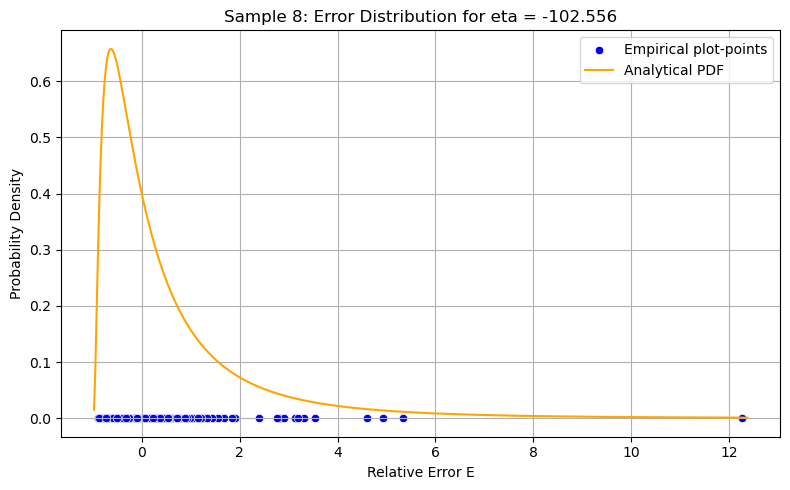

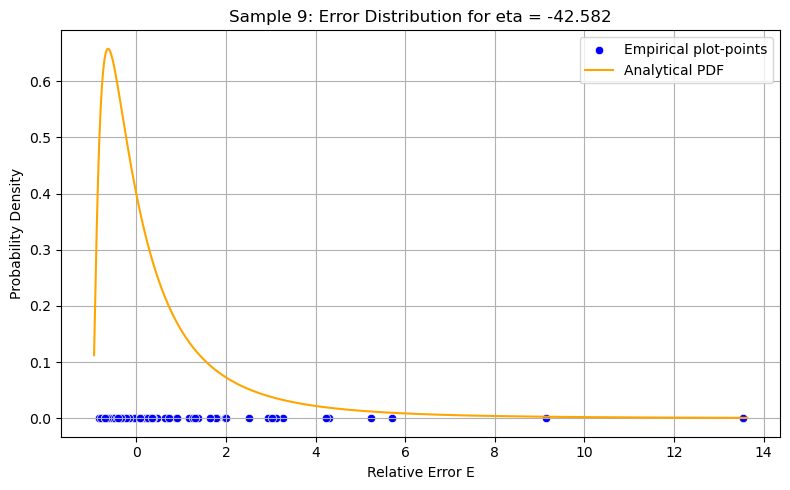

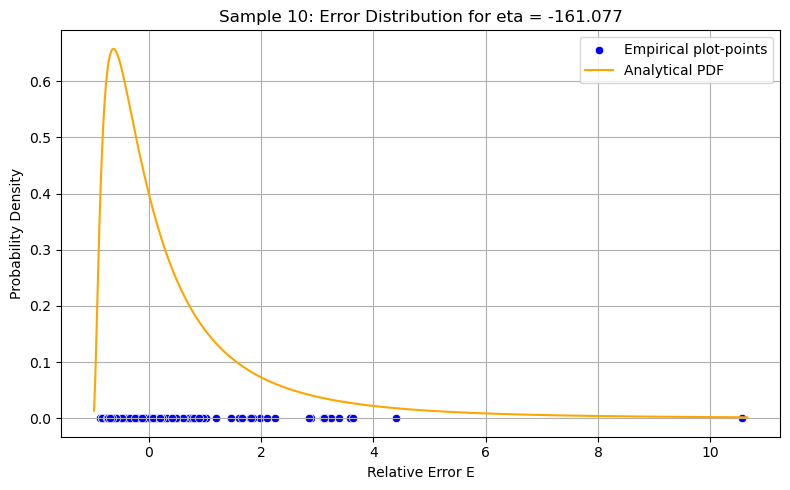

In [24]:
#Now, we select each sample and produce a graph for it.
for i in range(10):
    #Define p = e^(eta_true)
    p = np.exp(true_samples[i, 0])
    #Fetch the errors.
    err_vals = errors[i]  
    #Fetching empirical scatterplot.
    plt.figure(figsize = (8, 5))
    sns.scatterplot(x = err_vals, y = np.zeros_like(err_vals), color = 'blue', label = 'Empirical plot-points')
    #Fetching analytical PDF over same range of E.
    err_grid = np.linspace(min(err_vals) - 0.1, max(err_vals) + 0.1, 500)
    #Defining the error terms to be used for substitution.
    K = (1 + err_grid) / (1 - p * err_grid)
    #Defining the PDF function.
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        pdf = ((1 + p * K)**2 / ((1 + p) * np.sqrt(2 * np.pi))) * K ** (-0.5 * np.log(K) - 1)
    # Clean up overflows from invalid regions.
    valid = np.isfinite(pdf)
    plt.plot(err_grid[valid], pdf[valid], color = 'orange', label = 'Analytical PDF')
    #Labelling the graphs
    plt.title(f'Sample {i+1}: Error Distribution for eta = {true_samples[i, 0]:.3f}')
    plt.xlabel('Relative Error E')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Observations:
1. We see that the scatterplot points per sample concentrate under the peak of the PDF curve. This shows that our empirical and analytical probabilities co-incide, and give accurate results.
2. For largely positive $\eta$, we see that the curve almost collapses to 0, as demonstrated in sample 6. Since our curve is based on an exponential measure of eta, the curve will start saturating/collapsing towards 0 as $p = e^{\eta} \rightarrow \infty$. Hence, there will be near to 0 error effects in the sigmoid measure.

## Results:
The PDF so derived for the relative error E is correct, and hence, can be written as:
$$\boxed{P(E) = \frac{(1 + p)}{\sqrt{2 \pi}\,(E + 1)\,(1 - E p)} 
\left( \frac{1 + E}{1 - E p} \right)^{ -\frac{1}{2} \ln\left( \frac{1 + E}{1 - E p} \right) }}$$

This shows how the our actual noiseless predicted value for p affects the relative error graph, introducing skewness if exceedingly large.
This PDF gives us an accurate measure of the robustness/accuracy of the sigmoid function in logistic regression, and how the true values affect the errors.

1. For large p: PDF is flat. So noise causes small distortions.
2. For small p: PDF is steep. So even small noise causes large relative errors.
3. This suggests sigmoid outputs near 0.5 are more stable under noise, while confident predictions degrade more under small perturbations.